In [1]:
import readfile as rf
import classtriez as cs
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = "web-Stanford.txt/web-Stanford.txt"
edges = rf.read_dataset(dataset_path)

In [23]:
# Parameters
sample_size = 10000
num_runs = 5 
true_triangle_num = 11329473  

In [46]:
# Initialize results lists
base_results = []
base_differences = []

In [47]:
# Run the experiments
start_time = time.time()
for run in range(num_runs):
    print(f"running...{run+1}/{num_runs}: ")
    # Initialize algorithms for each run
    triest_base = cs.TriestBase(sample_size)

    # Process the stream
    for edge in edges:
        triest_base.process_edge(edge)

    # Store results
    base_results.append(triest_base.estimate())
    base_differences.append(triest_base.estimate()/ true_triangle_num)


end_time = time.time()

running...1/5: 
running...2/5: 
running...3/5: 
running...4/5: 
running...5/5: 


In [48]:
base_results

[24450556, 24449887, 36673064, 12224816, 24447626]

In [49]:
base_time_avg = (end_time - start_time) / num_runs
base_time_avg

39.3668595790863

In [50]:
base_avg = sum(base_results) / num_runs
base_avg

24449189.8

In [51]:
base_avg_differences = sum(base_differences) / num_runs
base_avg_differences

2.1580165114476197

In [38]:
impr_results = []
impr_differences = []

In [ ]:
# Run the experiments
start_time = time.time()
for run in range(num_runs):
    print(f"running...{run+1}/{num_runs}: ")
    # Initialize algorithms for each run
    triest_impr = cs.TriestImpr(sample_size)

    # Process the stream
    for edge in edges:
        triest_impr.process_edge(edge)

    # Store results
    impr_results.append(triest_impr.estimate())
    impr_differences.append(triest_impr.estimate()/ true_triangle_num)

end_time = time.time()

running...1/5: 
running...2/5: 
running...3/5: 
running...4/5: 
running...5/5: 


In [40]:
impr_time_avg = (end_time - start_time) / num_runs
impr_time_avg

47.68879170417786

In [41]:
impr_avg = sum(impr_results) / num_runs
impr_avg

17926111.6

In [42]:
impr_avg_differences = sum(impr_differences) / num_runs
impr_avg_differences

1.5822546732756235

In [63]:
# Output results
print("TRIÈST-BASE Results:")
print(f"  Average Time Taken: {base_time_avg:.2f} seconds")
print("  Individual Estimates: ", base_results)
print("  Average Estimate: ", base_avg)
print("  Average Estimate difference: ", base_avg_differences)


print("\nTRIÈST-IMPR Results:")
print(f"  Average Time Taken: {impr_time_avg:.2f} seconds")
print("  Individual Estimates: ", impr_results)
print("  Average Estimate: ", impr_avg)
print("  Average Estimate difference: ", impr_avg_differences)

TRIÈST-BASE Results:
  Average Time Taken: 39.37 seconds
  Individual Estimates:  [13609713, 13609713, 21169088, 21169088, 30240211, 30240211]
  Average Estimate:  24449189.8
  Average Estimate difference:  2.1580165114476197

TRIÈST-IMPR Results:
  Average Time Taken: 47.69 seconds
  Individual Estimates:  [17043178, 17043178, 16886393, 16886393, 17312065, 17312065]
  Average Estimate:  17926111.6
  Average Estimate difference:  1.5822546732756235


In [99]:
M_values = [1000, 2000, 5000, 10000, 20000]  # M from 1000 to 20000 in steps of 1000

In [100]:
base_estimates = []
impr_estimates = []
base_times = []
impr_times = []

In [101]:
# Run experiments for each M
for sample_size in M_values:
    print(f"Testing sample size M = {sample_size}...")
    base_results = []
    impr_results = []
    base_time_total = 0
    impr_time_total = 0

        
    # Initialize algorithms
    triest_base = cs.TriestBase(sample_size)
    triest_impr = cs.TriestImpr(sample_size)
    
    # Time TRIÈST-BASE
    start_time = time.time()
    for edge in edges:
        triest_base.process_edge(edge)
    base_time_total += time.time() - start_time

    # Time TRIÈST-IMPR
    start_time = time.time()
    for edge in edges:
        triest_impr.process_edge(edge)
    impr_time_total += time.time() - start_time

    # Record results
    base_estimates.append(triest_base.estimate())
    impr_estimates.append(triest_impr.estimate())
    base_times.append(base_time_total)
    impr_times.append(impr_time_total)


Testing sample size M = 1000...
Testing sample size M = 2000...
Testing sample size M = 5000...
Testing sample size M = 10000...
Testing sample size M = 20000...


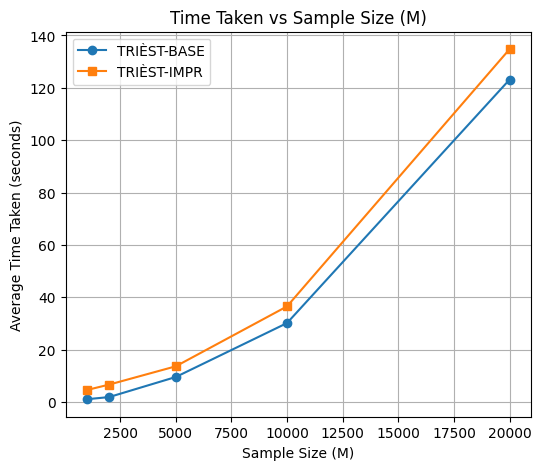

In [103]:
plt.figure(figsize=(6, 5))

# Time Taken
plt.plot(M_values, base_times, label="TRIÈST-BASE", marker='o')
plt.plot(M_values, impr_times, label="TRIÈST-IMPR", marker='s')
plt.title("Time Taken vs Sample Size (M)")
plt.xlabel("Sample Size (M)")
plt.ylabel("Average Time Taken (seconds)")
plt.legend()
plt.grid(True)

plt.show()